# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

2435b65ab39202a5911b46c2bb31061e


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations  
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(lat_range[1])

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

90
Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()
# print(url+'&q=bluff')
# print(json.dumps(city_weather,indent=4))
   
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
#         Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | koutsouras
Processing Record 6 of Set 1 | molteno
Processing Record 7 of Set 1 | sorong
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | teya
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | buctzotz
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | tongsa
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | piranhas
Processing Record 22 of Set 1 | kisanga
Processing R

Processing Record 37 of Set 4 | liku
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | grand-lahou
Processing Record 41 of Set 4 | haines junction
Processing Record 42 of Set 4 | toliary
City not found. Skipping...
Processing Record 43 of Set 4 | goundi
Processing Record 44 of Set 4 | ahmadpur sial
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | novikovo
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | escarcega
Processing Record 49 of Set 4 | port alfred
Processing Record 0 of Set 5 | brzesko
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | kijang
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | sarakhs
Processing Record 9 of Set 5 | aykhal
Processing Record 10 of Set 5 | s

Processing Record 31 of Set 8 | marystown
Processing Record 32 of Set 8 | imeni poliny osipenko
Processing Record 33 of Set 8 | epe
Processing Record 34 of Set 8 | mudgee
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | guanica
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | nelson bay
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | schwanewede
Processing Record 42 of Set 8 | miyakonojo
Processing Record 43 of Set 8 | pietarsaari
Processing Record 44 of Set 8 | havre-saint-pierre
Processing Record 45 of Set 8 | awbari
Processing Record 46 of Set 8 | anadyr
Processing Record 47 of Set 8 | steamboat springs
Processing Record 48 of Set 8 | svetlogorsk
Processing Record 49 of Set 8 | skibbereen
Processing Record 0 of Set 9 | kattivakkam
Processing Record 1 of Set 9 | gushikawa
Processing Record 2 of Set 9 | kosh-agach
Processing Record 3 of Se

Processing Record 16 of Set 12 | wattegama
Processing Record 17 of Set 12 | filingue
Processing Record 18 of Set 12 | kidal
Processing Record 19 of Set 12 | padang
Processing Record 20 of Set 12 | shenjiamen
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | nigde
Processing Record 23 of Set 12 | nsanje
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | bayan
Processing Record 26 of Set 12 | great bend
Processing Record 27 of Set 12 | cap-aux-meules
Processing Record 28 of Set 12 | sheksna
Processing Record 29 of Set 12 | agadir
Processing Record 30 of Set 12 | santiago
Processing Record 31 of Set 12 | impfondo
Processing Record 32 of Set 12 | ifakara
Processing Record 33 of Set 12 | coahuayana
Processing Record 34 of Set 12 | khromtau
Processing Record 35 of Set 12 | bulungu
Processing Record 36 of Set 12 | nanakuli
Processing Record 37 of Set 12 | kokopo
Processing Record 38 of Set 12 | krasnovishersk
Processing Record 39 of Set 12 | aca

In [4]:
# print(city_weather["coord"]["lat"])
# print(city_weather['coord']['lon'])
# # city_max_temp = # YOUR CODE HERE
# city_humidity = # YOUR CODE HERE
# city_clouds = # YOUR CODE HERE
# city_wind = # YOUR CODE HERE
# city_country = # YOUR CODE HERE
# city_date = # YOUR CODE HERE

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.0500,179.3167,275.93,78,100,9.05,RU,1667719200
1,provideniya,64.3833,-173.3000,275.17,99,100,9.60,RU,1667719200
2,vaini,-21.2000,-175.2000,296.24,88,40,3.60,TO,1667719200
3,east london,-33.0153,27.9116,295.50,60,0,2.14,ZA,1667719046
4,koutsouras,35.0339,25.9469,295.43,70,0,8.49,GR,1667719201


In [7]:
city_data_df["Max Temp(Celsius)"]=city_data_df["Max Temp"]-273.1

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp(Celsius)
City_ID,,,,,,,,,,
0,beringovskiy,63.0500,179.3167,275.93,78,100,9.05,RU,1667719200,2.83
1,provideniya,64.3833,-173.3000,275.17,99,100,9.60,RU,1667719200,2.07
2,vaini,-21.2000,-175.2000,296.24,88,40,3.60,TO,1667719200,23.14
3,east london,-33.0153,27.9116,295.50,60,0,2.14,ZA,1667719046,22.40
4,koutsouras,35.0339,25.9469,295.43,70,0,8.49,GR,1667719201,22.33


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

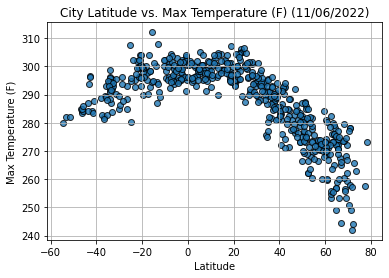

In [10]:
# Build scatter plot for latitude vs. temperature
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({date})')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

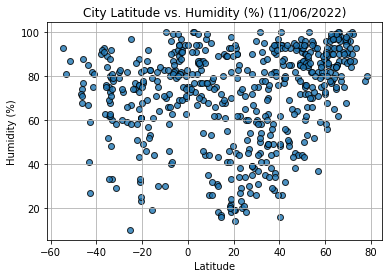

In [11]:
# Build the scatter plots for latitude vs. humidity


x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

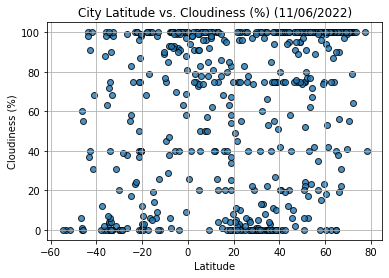

In [12]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({date})')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

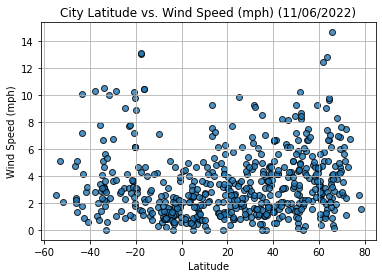

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({date})')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(data_df,a,xx,yy):
    x_values = data_df['Lat']
    y_values = data_df[a]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(xx,yy),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Humidity (%)')
    plt.title("Humidity (%) vs Latitude in Southern Hemisphere")
    plt.show()
    print(f"The r-value is: {rvalue}")


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp(Celsius)
City_ID,,,,,,,,,,
0,beringovskiy,63.0500,179.3167,275.93,78,100,9.05,RU,1667719200,2.83
1,provideniya,64.3833,-173.3000,275.17,99,100,9.60,RU,1667719200,2.07
4,koutsouras,35.0339,25.9469,295.43,70,0,8.49,GR,1667719201,22.33
8,teya,60.3778,92.6267,270.72,86,99,3.06,RU,1667719203,-2.38
9,tuktoyaktuk,69.4541,-133.0374,259.48,90,100,6.86,CA,1667719203,-13.62


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp(Celsius)
City_ID,,,,,,,,,,
2,vaini,-21.2000,-175.2000,296.24,88,40,3.60,TO,1667719200,23.14
3,east london,-33.0153,27.9116,295.50,60,0,2.14,ZA,1667719046,22.40
5,molteno,-31.3968,26.3625,290.35,58,2,2.38,ZA,1667719201,17.25
6,sorong,-0.8833,131.2500,302.55,70,97,1.86,ID,1667719202,29.45
7,rikitea,-23.1203,-134.9692,295.03,77,100,7.73,PF,1667719202,21.93


###  Temperature vs. Latitude Linear Regression Plot

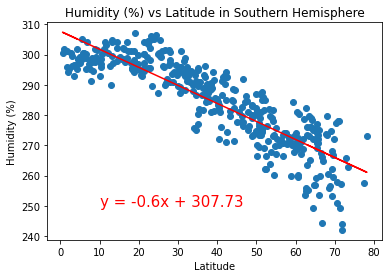

The r-value is: -0.8717150106001487


In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_plot(northern_hemi_df,"Max Temp",10,250)


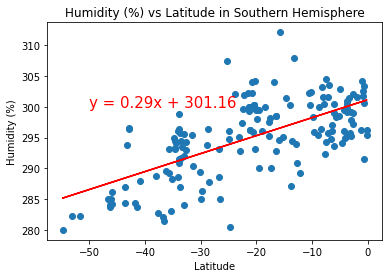

The r-value is: 0.6531986520326547


In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_plot(southern_hemi_df,"Max Temp",-50,300)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

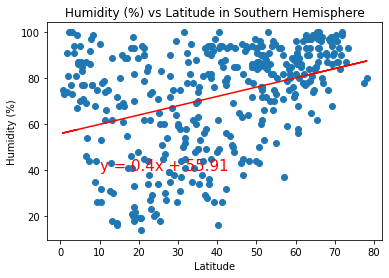

The r-value is: 0.36316371931385244


In [19]:
# Northern Hemisphere
# YOUR CODE HERE
linear_plot(northern_hemi_df,"Humidity",10,40)

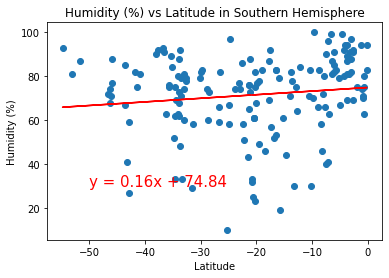

The r-value is: 0.12588384767840377


In [20]:
# Southern Hemisphere
# YOUR CODE HERE
linear_plot(southern_hemi_df,"Humidity",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

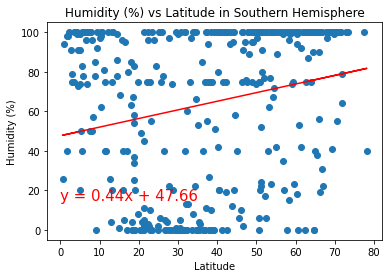

The r-value is: 0.22569199217903177


In [21]:
# Northern Hemisphere
linear_plot(northern_hemi_df,"Cloudiness",0,15)

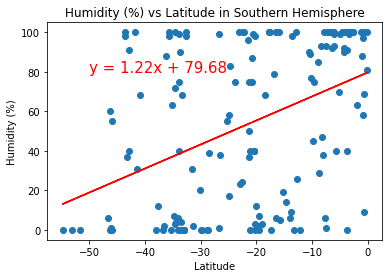

The r-value is: 0.41508394948544525


In [22]:
# Southern Hemisphere
linear_plot(southern_hemi_df,"Cloudiness",-50,80)

In [23]:
# There is a negative correlation between Max Temp and Latitude. As you get further into the N. Hemisphere, Max Temps decrease.
# There is a very, very weak negative correlation (r is very close to 0) between cloudiness and latitude as you get closer to the equator in the southern hemisphere.
# Cloudiness decreases slightly as you get closer to the equator.
# We have a very weak positive correlation, with our r value being very close to 0. There is no relationship between cloudiness and latitude in the northern hemisphere.
# This is similar to what we saw in the previous cloudiness scatterplot that included both hemispheres.
# Cloudiness increases slightly as you go further north.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

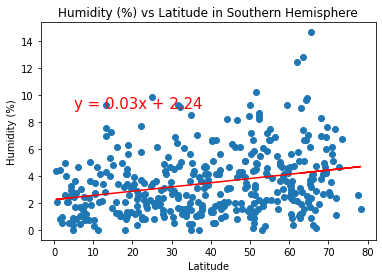

The r-value is: 0.2686664733266847


In [24]:
# Northern Hemisphere
linear_plot(northern_hemi_df,"Wind Speed",5,9)

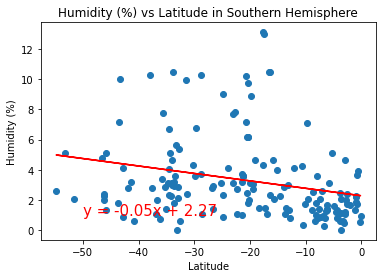

The r-value is: -0.2533434560513494


In [25]:
# Southern Hemisphere
# YOUR CODE HERE
linear_plot(southern_hemi_df,"Wind Speed",-50,1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There is a negative correlation between Max Temp and Latitude. As you get further into the N. Hemisphere, Max Temps decrease.
# There is a very, very weak negative correlation (r is very close to 0) between cloudiness and latitude as you get closer to the equator in the southern hemisphere.
# Cloudiness decreases slightly as you get closer to the equator.
# We have a very weak positive correlation, with our r value being very close to 0. There is no relationship between cloudiness and latitude in the northern hemisphere.
# This is similar to what we saw in the previous cloudiness scatterplot that included both hemispheres.
# Cloudiness increases slightly as you go further north.